# Exercice 11

In [1]:
# Home-made DFT
import numpy as np
from numpy.fft import *
import matplotlib.pyplot as plt


def DFT(x):
    N = len(x)
    n = np.arange(N)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2).reshape((N, 1))
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)

    return M @ x / N

# Ou en utilisant des boucles (beaucoup plus lent !)


def DFT2(x):
    N = len(x)

    X = np.zeros(N, dtype=complex)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2).reshape((N, 1))
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))
    for (i, k_) in enumerate(k):
        for n in range(N):
            X[i] += x[n] * np.exp(-2j * np.pi * k_ * n / N)

    return X / N

# Inverse DFT


def IDFT(X):

    N = len(X)
    n = np.arange(N)
    if N % 2 == 0:
        k = np.arange(-N/2, N/2).reshape((N, 1))
    else:
        k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)

    return X @ M

In [2]:
def plot_DFT(k, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all, bounds=(-10, 10)):
    # Plot
    fig, ax = plt.subplots(3, figsize=(15, 15))

    ax[0].plot(x_all, u_all, label="u(x)", c='C0')
    ax[0].plot(x, np.real(u_rec), label="u_rec", c='C1')
    ax[0].plot(x, np.real(u_rec_np), label="u_rec_np", c='C2')
    ax[0].set_title("Time domain")
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("u")
    ax[0].legend()

    ax[1].plot(k, np.real(u_k), 'o-', label="$\Re(u_k)$ : DFT", c='C0')
    ax[1].plot(k, np.real(u_k_np), label="$\Re(u_k)$ : numpy",
               c='C0', linestyle='--')
    ax[1].plot(k, np.imag(u_k), 'o-', label="$\Im(u_k)$ : DFT", c='C1')
    ax[1].plot(k, np.imag(u_k_np), label="$\Im(u_k)$ : numpy",
               c='C1', linestyle='--')
    ax[1].set_xbound(bounds[0], bounds[1])
    ax[1].set_title("Frequency domain")
    ax[1].set_xlabel("k")
    ax[1].set_ylabel("u_k")
    ax[1].legend()

    ax[2].plot(k, np.abs(u_k), 'o-', label="$|u_k|$ : DFT", c='C0')
    ax[2].plot(k, np.abs(u_k_np), label="$|u_k|$ : numpy",
               c='C0', linestyle='--')
    ax[2].set_xbound(0.0, bounds[1])
    ax[2].set_title("Amplitude spectrum")
    ax[2].set_xlabel("k")
    ax[2].set_ylabel("|u_k|")
    ax[2].legend()

    plt.show()

Temps de calcul pour N = 20 avec DFT :
17.4 µs ± 74 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Temps de calcul pour N = 20 avec numpy :
8.88 µs ± 48 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


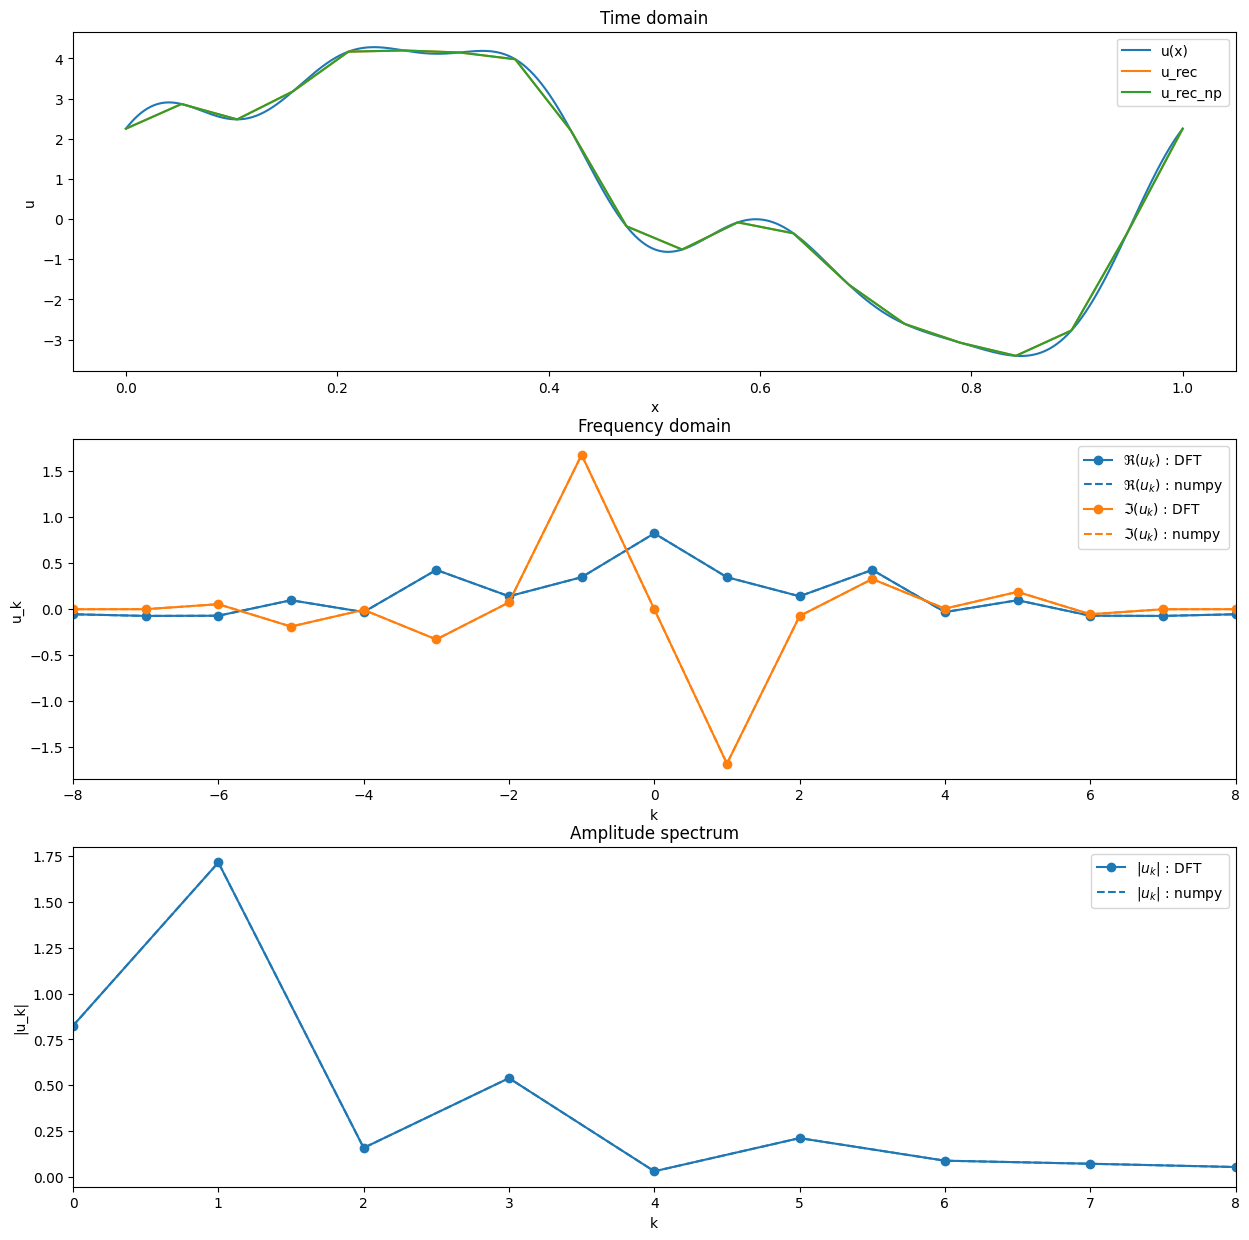

In [3]:
# Test 1: spectre discret
freqs_sin = [1.0, 2.0, 4.0, 6.0]
amplis_sin = [3.5, 0.5, 0.1, 0.075]
freqs_cos = [0.0, 3.0, 5.0]
amplis_cos = [0.75, 1.0, 0.5]
# -> definit un spectre discret

f = lambda x: sum([a * np.sin(2 * np.pi * f * x) for a, f in zip(amplis_sin, freqs_sin)]) + sum([a * np.cos(2 * np.pi * f * x) for a, f in zip(amplis_cos, freqs_cos)])

x_all = np.linspace(0, 1, 5000)
u_all = f(x_all)

N = 20
x = np.linspace(0, 1, N)
u = f(x)
if N % 2 == 0:
    k = np.arange(-N/2, N/2).reshape((N, 1))
else:
    k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

print(f"Temps de calcul pour N = {N} avec DFT :")
%timeit DFT(u)

u_k = DFT(u)
u_rec = IDFT(u_k)

# Via numpy
print(f"Temps de calcul pour N = {N} avec numpy :")
%timeit fftshift(fft(u)) / N
u_k_np = fftshift(fft(u)) / N
u_rec_np = ifft(ifftshift(u_k_np)) * N

plot_DFT(k, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all, bounds=(-max(freqs_sin + freqs_cos) - 2, max(freqs_sin + freqs_cos) + 2))


Temps de calcul pour N = 20 avec DFT :
18.1 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
Temps de calcul pour N = 20 avec numpy :
8.72 µs ± 220 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


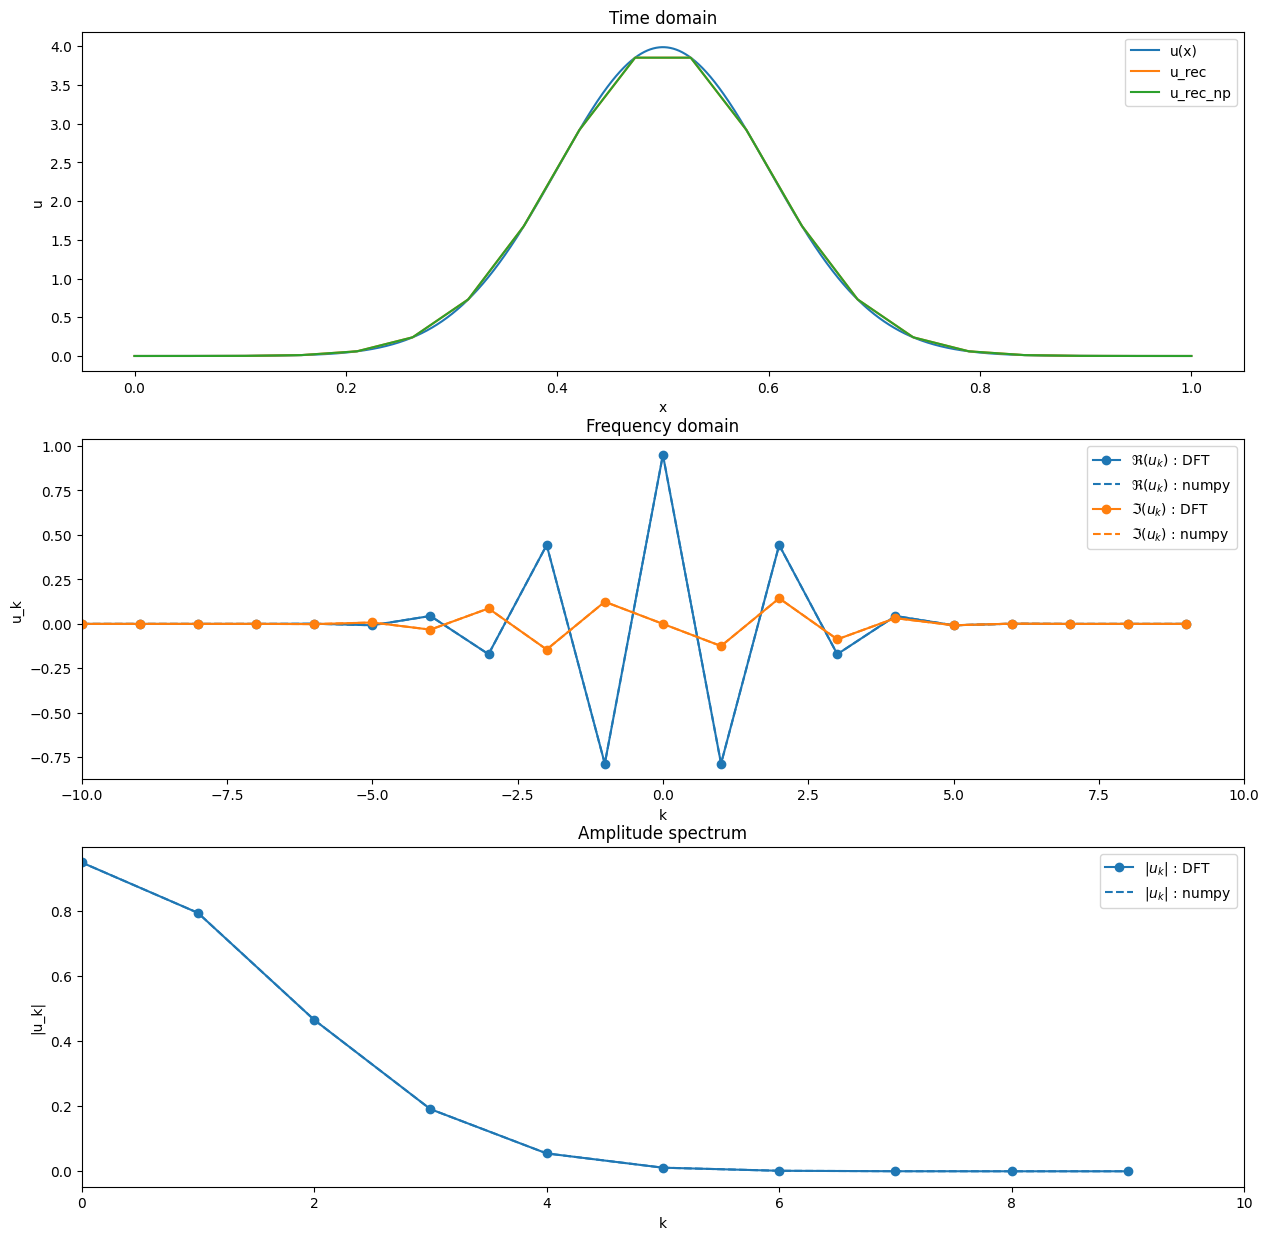

In [4]:
# Test 2: spectre continu
x_all = np.linspace(0, 1, 5000)
mu, sigma = 0.5, 0.1
u_all = np.exp(- (x_all - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
u_analytic = lambda k: np.exp(1j * k * mu - (sigma*k)**2 / 2) / np.sqrt(2 * np.pi) # unused

N = 20
x = np.linspace(0, 1, N)
u = np.exp(- (x - mu)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
if N % 2 == 0:
    k = np.arange(-N/2, N/2).reshape((N, 1))
else:
    k = np.arange(-(N-1)/2, (N-1)/2 + 1).reshape((N, 1))

print(f"Temps de calcul pour N = {N} avec DFT :")
%timeit DFT(u)

u_k = DFT(u)
u_rec = IDFT(u_k)

# Via numpy
print(f"Temps de calcul pour N = {N} avec numpy :")
%timeit fftshift(fft(u)) / N
u_k_np = fftshift(fft(u)) / N
u_rec_np = ifft(ifftshift(u_k_np)) * N

plot_DFT(k, x, u_k, u_rec, u_k_np, u_rec_np, x_all, u_all)

In [5]:
%reset -f